In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


plt.style.use('seaborn-v0_8-pastel')
sns.set_palette("pastel")

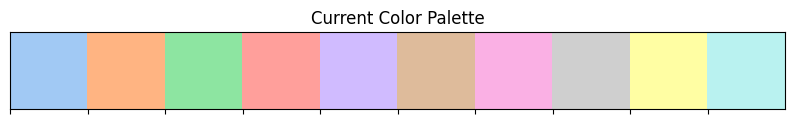

In [ ]:
# Get the current color palette
current_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot the colors in the palette
sns.palplot(current_palette)
plt.title("Current Color Palette")
plt.show()

#Data Reading
We've already cleaned the dataset and now it's in the CSV format.

In [ ]:
data = pd.read_csv('/content/cleaned_datatset_952_rows.csv')
data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59.0,2.0,2.0,Low,1,2010,Winter
1,NaN,25.0,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318.0,77.0,2.0,1.0,Low,8,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100.0,9.0,1.0,Low,6,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97.0,3.0,4.0,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85.0,7.0,2.0,High,1,2010,Summer


In [ ]:
print(np.shape(data))
# Get the data types of all columns
print(data.dtypes)

(952, 18)
Customer_ID                       object
Age                              float64
Gender                            object
Income_Level                      object
Address                           object
Transaction_ID                    object
Purchase_Date                     object
Product_ID                        object
Product_Category                  object
Brand                             object
Purchase_Amount                  float64
Average_Spending_Per_Purchase    float64
Purchase_Frequency_Per_Month     float64
Brand_Affinity_Score             float64
Product_Category_Preferences      object
Month                              int64
Year                               int64
Season                            object
dtype: object


# Exploratory Data Analysis
In this module we will be doing EDA and exploring multiple features during the process, It is also expected to derive and transform new variables during the process.

## Univariate Analysis
We will explore each and every approriate feature and create appropriate graphs and charts accordingly.

### Age:
The Age column is a numerical column, thus it can be visualized using histogram to have an idea of frequency of ages in different ranges:

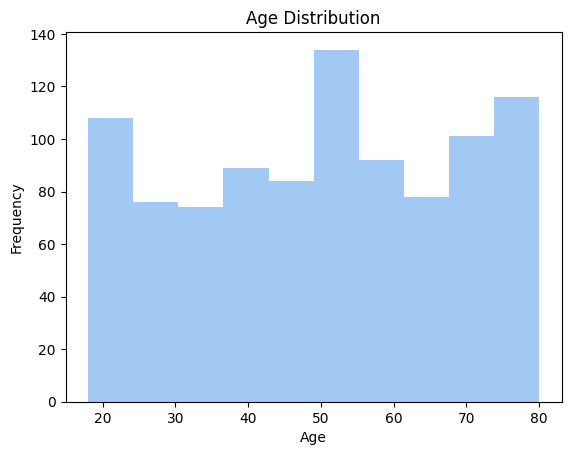

In [ ]:
plt.hist(data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Age Group:
Although, Age can be visualized appropriately using Histogram, but still a better way of visualizing age would be by deriving a new column called **Age Group**, The graph shows better insights about age.
We devided Age into 5 Age groups and analyzed that **Adults** have the highest frequency followed by **Senior** category.

In [ ]:
bins = [0, 12, 19, 35, 60, 81]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create a new 'Age Group' column
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

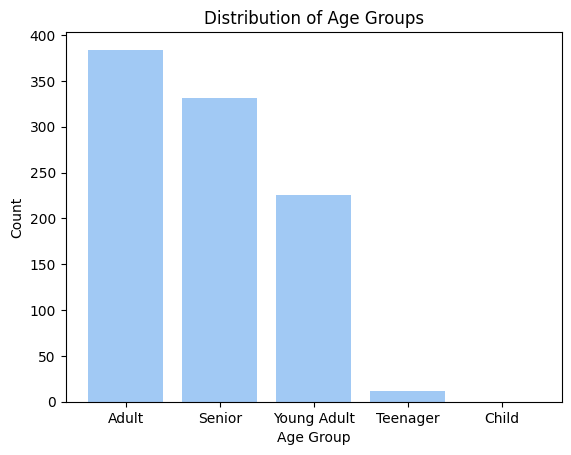

In [ ]:
# Count the occurrences of each age group
age_group_counts = data['Age Group'].value_counts()

plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()#

### Gender:
The gender is a categorical variable, and on exploring it appeared to have 4 categories with **Others** being the most occuring.

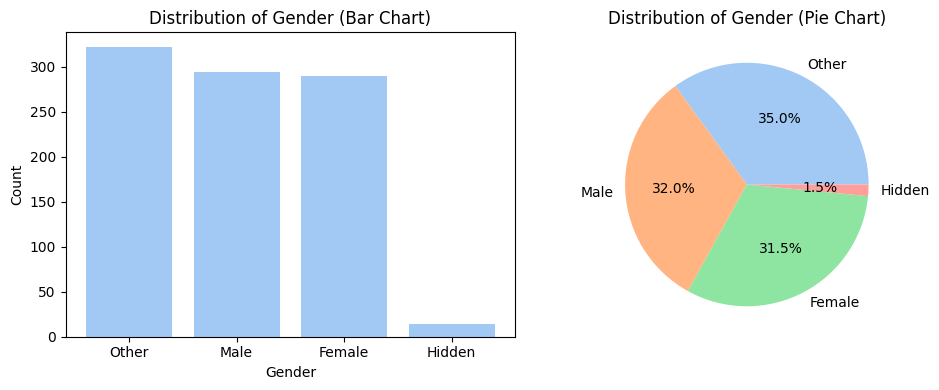

In [ ]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(10, 4))

# Bar chart on the first subplot
plt.subplot(1, 2, 1)
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender (Bar Chart)')

# Pie chart on the second subplot
plt.subplot(1, 2, 2)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Gender (Pie Chart)')


plt.tight_layout()
plt.show()

### Income Level
The income level is a categorical variable thus, It can be Visualize using Bar and Pie chart. It is analyzed that Income Level have 4 categories:
- High
- Medium
- Low
- Hidden

with **Medium** having the highest frequency.

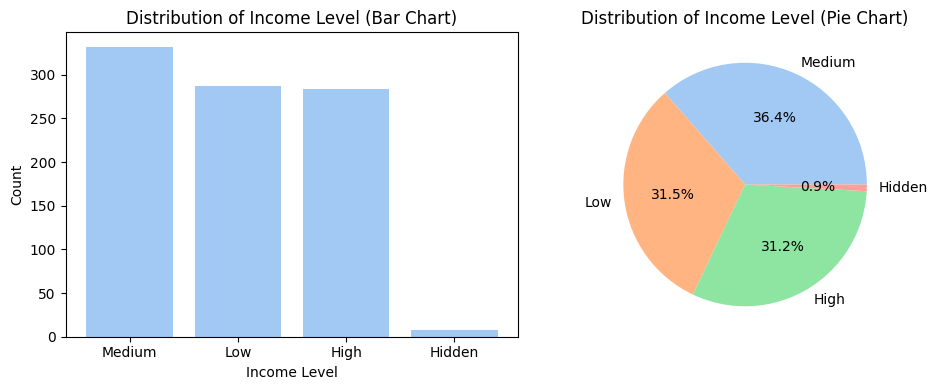

In [ ]:
income_level_counts = data['Income_Level'].value_counts()

plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.bar(income_level_counts.index, income_level_counts.values)
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Income Level (Bar Chart)')

plt.subplot(1, 2, 2)
plt.pie(income_level_counts.values, labels=income_level_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Income Level (Pie Chart)')

plt.tight_layout()
plt.show()

### Purchase Date:
There's no way directly to explore Purchase Date, because of the extensive diversity in the uniquness of dates. Thus, We need to reduce the uniquness by only catering the month and Year properties of the date. By doing so, We can easily explore the trends over time.
It can be seen that there are no specific trends with the passage of time, however there are few spikes throughout the time.

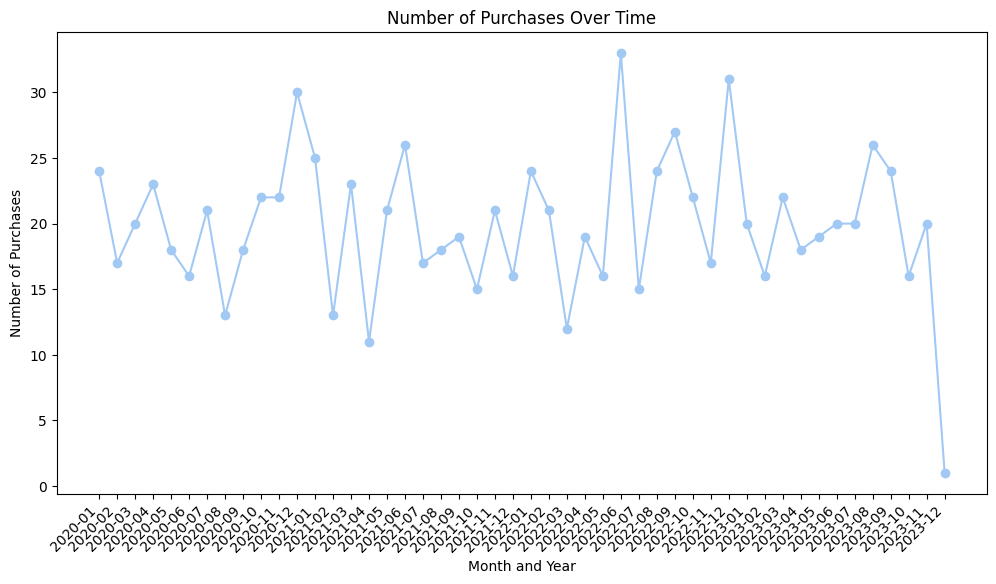

In [ ]:
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'])

# Create a new column with only month and year
data['Purchase_Date_Month_Year'] = data['Purchase_Date'].dt.to_period('M')

# Count the occurrences of each month and year
purchase_date_counts = data['Purchase_Date_Month_Year'].value_counts().sort_index()
# Plot the trends over time
plt.figure(figsize=(12, 6))
plt.plot(purchase_date_counts.index.astype(str), purchase_date_counts.values, marker='o')
plt.xlabel('Month and Year')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases Over Time')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Sales Frequency per year
This graph is shows the ammount of purchases done in every year. We can see that **2022** have the maximum number of sales.


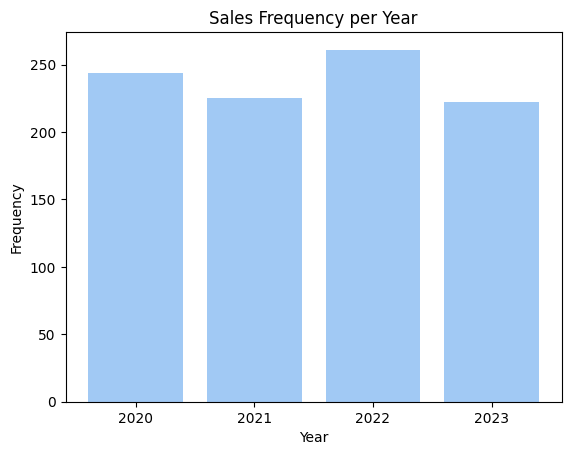

In [ ]:
data['Sales_Frequence_per_year'] = data['Purchase_Date'].dt.year
purchase_date_counts = data['Sales_Frequence_per_year'].value_counts().sort_index()
# Create a bar chart
plt.bar(purchase_date_counts.index, purchase_date_counts.values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Sales Frequency per Year')
plt.xticks(purchase_date_counts.index)          # Set x-axis ticks as integers
plt.show()

#### Sales Frequency per Month
This graph shows the ammount of purchases done in every month. We can see that **January & June** have the maximum number of sales.

**NOTE:** This is not the variable present in the dataset earlier. That Purchase frequency per month is of an indvidual customer, This is total sales frequency per month.

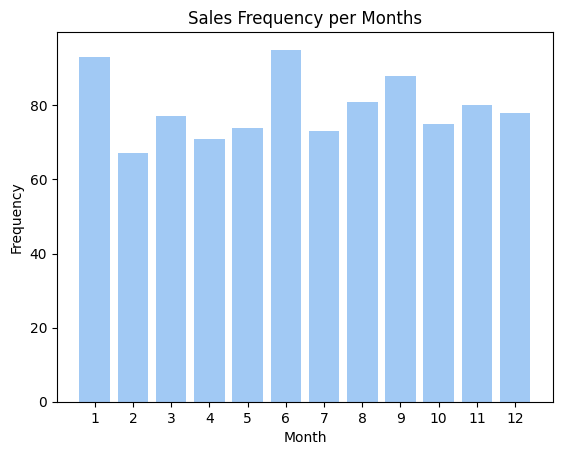

In [ ]:
data['Sales_Frequency_per_Month'] = data['Purchase_Date'].dt.month
month_counts = data['Sales_Frequency_per_Month'].value_counts().sort_index()

# Create a bar chart
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Sales Frequency per Months')
plt.xticks(month_counts.index)          # Set x-axis ticks as integers
plt.show()

### Product Category:
Product Category is a categorical variable defining the categories of products having 4 categories with **Electronics** being the dominant among them.

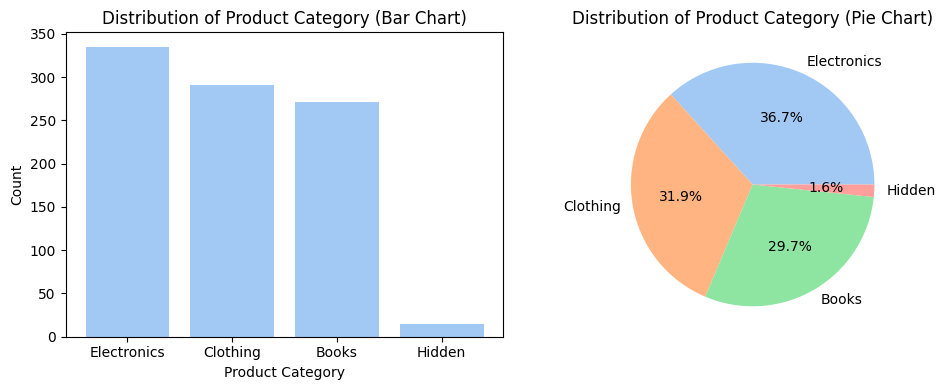

In [ ]:
product_category_counts = data['Product_Category'].value_counts()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(product_category_counts.index, product_category_counts.values)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Product Category (Bar Chart)')

plt.subplot(1, 2, 2)
plt.pie(product_category_counts.values, labels=product_category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Product Category (Pie Chart)')

plt.tight_layout()
plt.show()

### Brand:
We dont have any information about the Brand details but it have 4 categories as far as we know with **Brand_C** containing the most items.

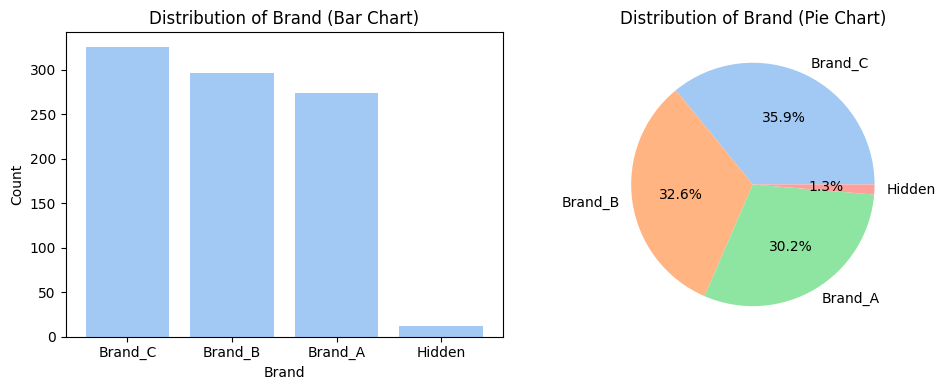

In [ ]:
brand_counts = data['Brand'].value_counts()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Brand (Bar Chart)')

plt.subplot(1, 2, 2)
plt.pie(brand_counts.values, labels=brand_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Brand (Pie Chart)')

plt.tight_layout()
plt.show()


### Purchase Amount
Let's explore Purchase Amount using Histogram with a Density kernel for better visualization.

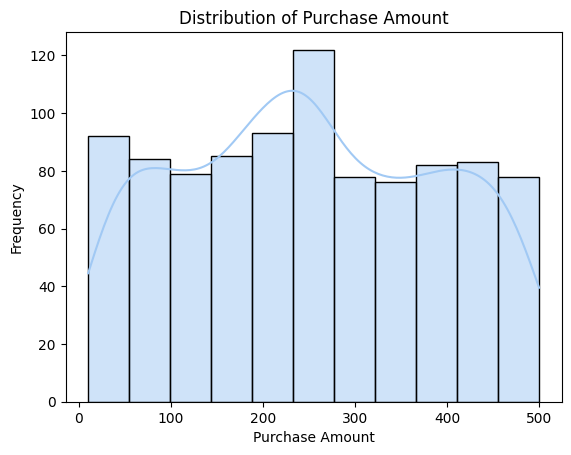

In [ ]:
sns.histplot(data['Purchase_Amount'], kde=True)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')
plt.show()

#### Product Range:
The Purchase Amount can be further explored by transforming the product into a range thus, we've distributed the products into three categories:
- **Cheap (0-100)**
- **Average (100-300)**
- **Expensive (300-500)**

we can see that Average priced range products dominate the dataset.

In [ ]:
data['Product Range'] = pd.cut(data['Purchase_Amount'], bins=[-1, 100, 300, 500], labels=['Cheap', 'Average', 'Expensive'])

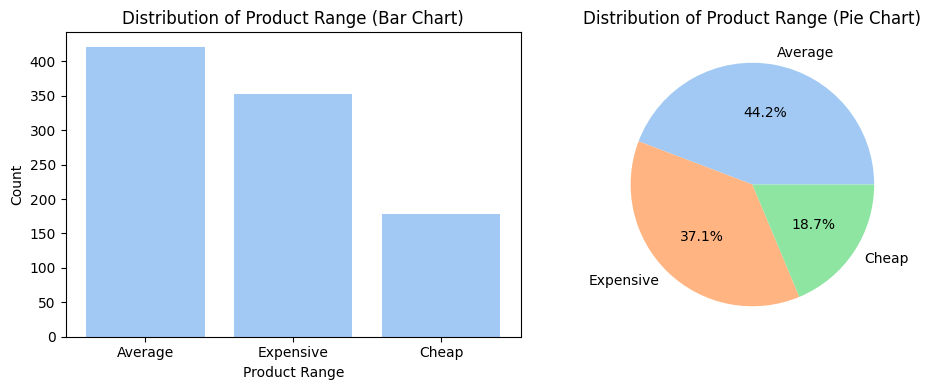

In [ ]:
product_range_counts = data['Product Range'].value_counts()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(product_range_counts.index, product_range_counts.values)
plt.xlabel('Product Range')
plt.ylabel('Count')
plt.title('Distribution of Product Range (Bar Chart)')

plt.subplot(1, 2, 2)
plt.pie(product_range_counts.values, labels=product_range_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Product Range (Pie Chart)')

plt.tight_layout()
plt.show()

### Average Spending Per Purchase
We can see that on average a customer spend 50$ on average purchase.

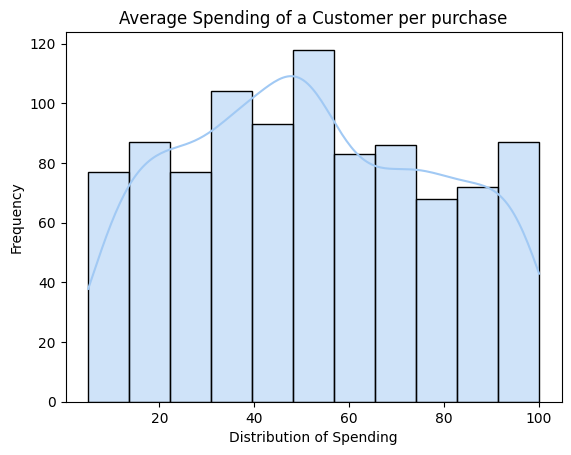

In [ ]:
sns.histplot(data['Average_Spending_Per_Purchase'], kde=True)
plt.xlabel('Distribution of Spending')
plt.ylabel('Frequency')
plt.title('Average Spending of a Customer per purchase')
plt.show()

### Brand Affinity Score
We've seen that brand affinity Score is not categorical as it have floating values as well, so a histogram would be preffered over a barchart

In [ ]:
data['Brand_Affinity_Score'].value_counts()

2.000000     107
6.000000      97
5.000000      97
8.000000      97
1.000000      88
3.000000      88
4.000000      83
10.000000     80
7.000000      78
9.000000      77
5.369542      60
Name: Brand_Affinity_Score, dtype: int64

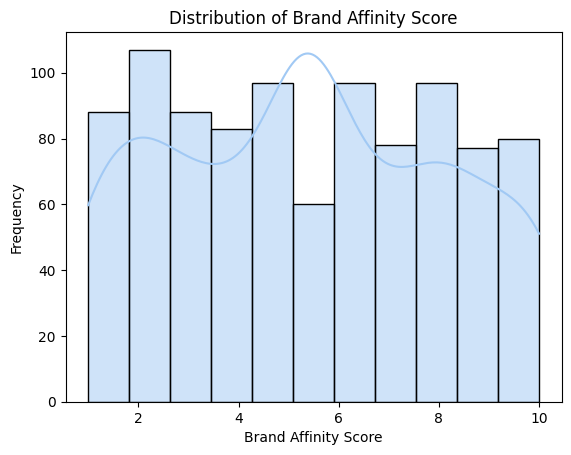

In [ ]:
sns.histplot(data['Brand_Affinity_Score'], kde=True)
plt.xlabel('Brand Affinity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Brand Affinity Score')
plt.show()

### Product Category Preferences
We can see that dataset is divided into Three preferences, with Low preference Sales dominating the Data.

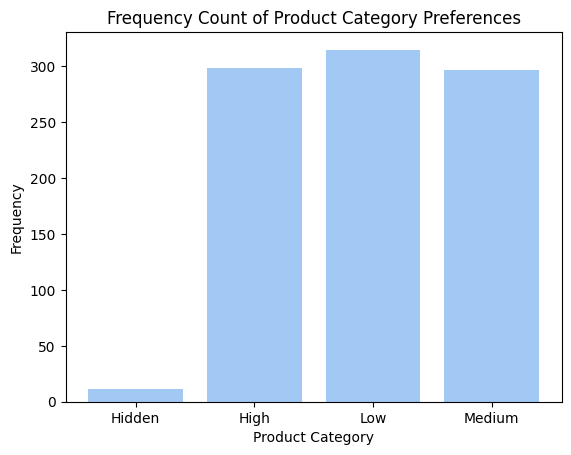

In [ ]:
product_category_preferences = data['Product_Category_Preferences'].value_counts().sort_index()

plt.bar(product_category_preferences.index, product_category_preferences.values)
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Frequency Count of Product Category Preferences')
plt.xticks(product_category_preferences.index)          # Set x-axis ticks as integers
plt.show()


### Season
It can be seen that all 4 Seasons dataset is given, having:
- Summer
- Autumn
- Winter
- Fall

with **Fall** having the highest frequency.

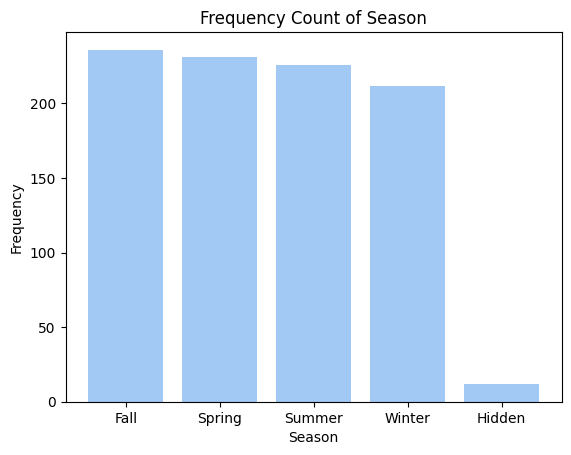

In [ ]:
season_counts = data['Season'].value_counts()
plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Frequency Count of Season')
plt.xticks(season_counts.index)          # Set x-axis ticks as integers
plt.show()

### Month
On exploring the Month variable we can see that June have the highest frequency.

**NOTE:** This is not the Sales or Purchase frequency in a month, We have no information about the introduction of this variable, This can be registeration, Manufacturing month of product.

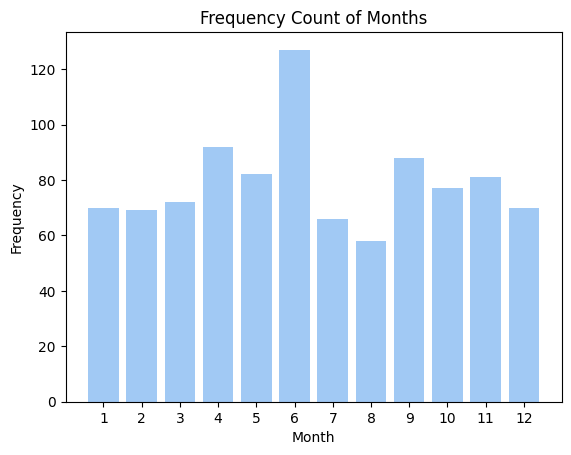

In [ ]:
month_counts = data['Month'].value_counts().sort_index()

# Create a bar chart
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency Count of Months')
plt.xticks(month_counts.index)          # Set x-axis ticks as integers
plt.show()

### Year
On exploring the Year variable we can see that **1998** have the highest frequency.

**NOTE:** This is not the Sales or Purchase frequency in a Year, We have no information about the introduction of this variable, This can be registeration/Manufacturing Year of product.

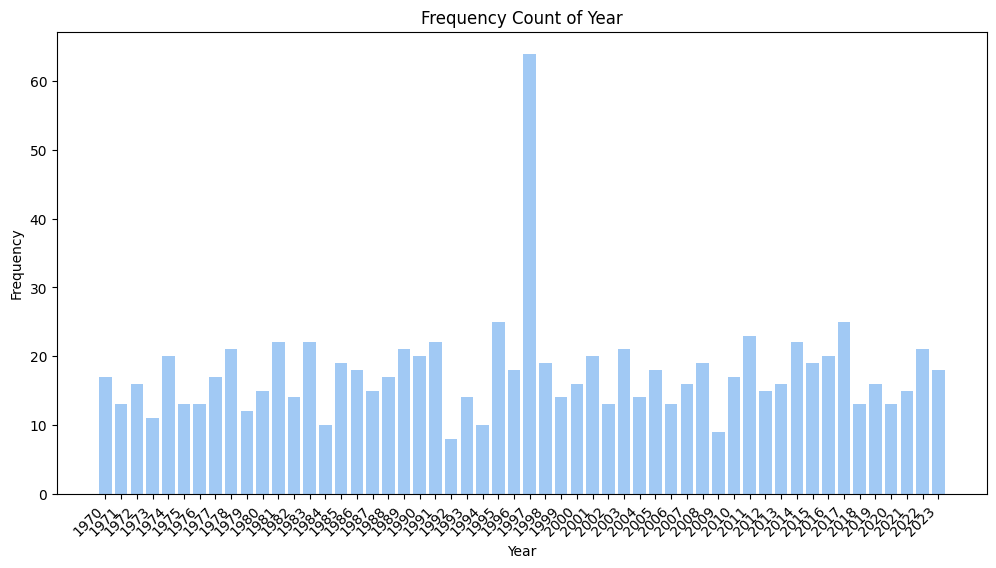

In [ ]:
year_count = data['Year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(year_count.index, year_count.values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency Count of Year')
plt.xticks(year_count.index)          # Set x-axis ticks as integers
plt.xticks(rotation=45, ha='right')
plt.show()

## Save Transformed File
Now that we've created 5 new variables:
- Age Group
- Purchase Date Month Year (contains only Month and Year from Purchase Date)
- Sales Frequency per Year
- Sales Frequency per Month
- Product Range

So, It's time to save this new file for better precision and accuracy in clustering.

In [ ]:
print(np.shape(data))
print(data.dtypes)
data.to_csv('transformed_datatset_22_variables.csv', index=False)

(952, 23)
Customer_ID                              object
Age                                     float64
Gender                                   object
Income_Level                             object
Address                                  object
Transaction_ID                           object
Purchase_Date                    datetime64[ns]
Product_ID                               object
Product_Category                         object
Brand                                    object
Purchase_Amount                         float64
Average_Spending_Per_Purchase           float64
Purchase_Frequency_Per_Month            float64
Brand_Affinity_Score                    float64
Product_Category_Preferences             object
Month                                     int64
Year                                      int64
Season                                   object
Age Group                              category
Purchase_Date_Month_Year              period[M]
Sales_Frequence_per_year      

## Bivariate Analysis

### Age Group vs Purchase Amount
This is a very important analysis in understanding spending patterns of different age group and if there are any specific differences.
On analyzing, we can observe that purchase amounts vary among age groups, with some showing more diverse spending behaviors. The box plot reveals no outliers, indicating consistent purchase amounts within each age group. This suggests uniform spending behavior without extreme highs or lows.







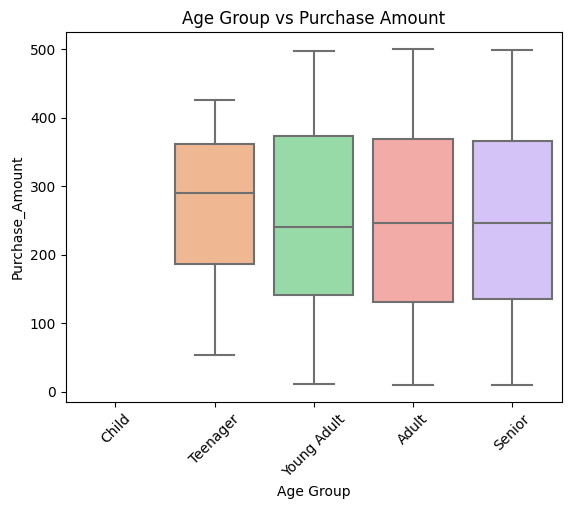

In [ ]:
sns.boxplot(data=data, x='Age Group', y='Purchase_Amount')
plt.title('Age Group vs Purchase Amount')
plt.xticks(rotation=45)
plt.show()

Lets draw heatmap for a different visualization, We will create 4 bins from quantiles for numerical column "purchase amount"

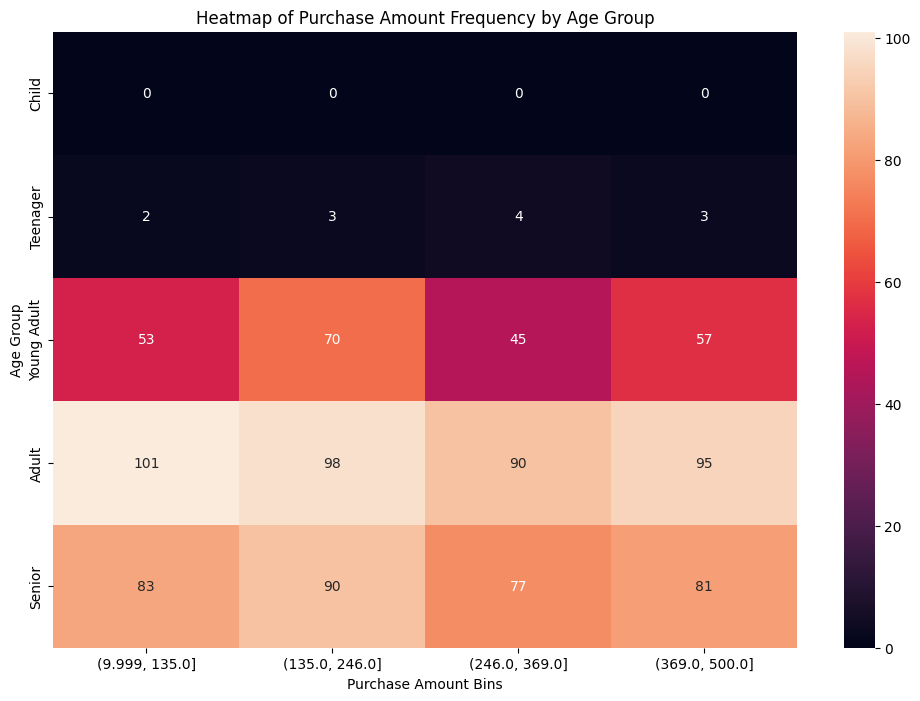

In [ ]:
data['Purchase_Amount_Bins'] = pd.qcut(data['Purchase_Amount'], q=4, duplicates='drop') # Create 4 quantile bins

# Creating a pivot table for the heatmap
pivot_table = data.pivot_table(index='Age Group', columns='Purchase_Amount_Bins', aggfunc='size', fill_value=0)

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title("Heatmap of Purchase Amount Frequency by Age Group")
plt.ylabel('Age Group')
plt.xlabel('Purchase Amount Bins')
plt.show()

### Gender vs Product Category
This analysis is very important to understand if there is any prefferance on products based on customer's gender. Upon analyzing we can see that the purchases of Electronics dominate the Dataset in all categories.

In [ ]:
ct = pd.crosstab(data['Gender'], data['Product_Category'])
ct

Product_Category,Books,Clothing,Electronics,Hidden
Gender,,,,
Female,79,91,102,4
Hidden,5,4,4,0
Male,82,92,99,6
Other,94,93,122,5


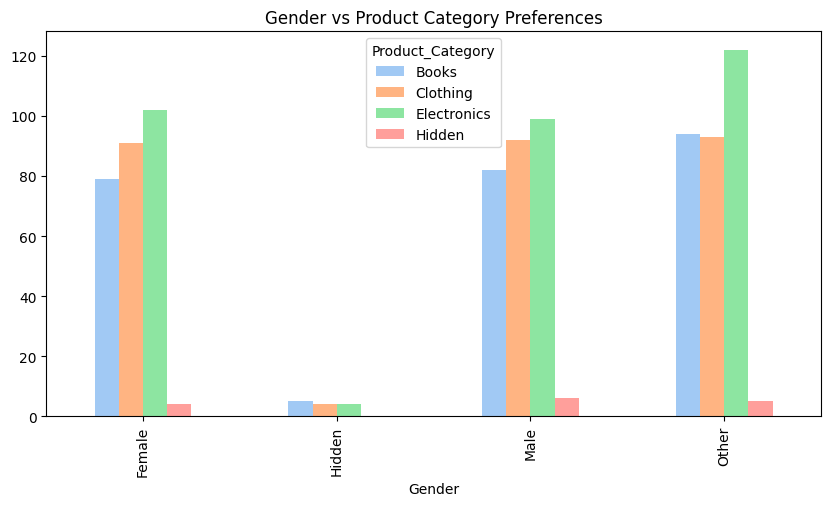

In [ ]:
ct.plot(kind='bar', figsize=(10, 5))
plt.title('Gender vs Product Category Preferences')
plt.show()

Let's try a different visualization for this relation

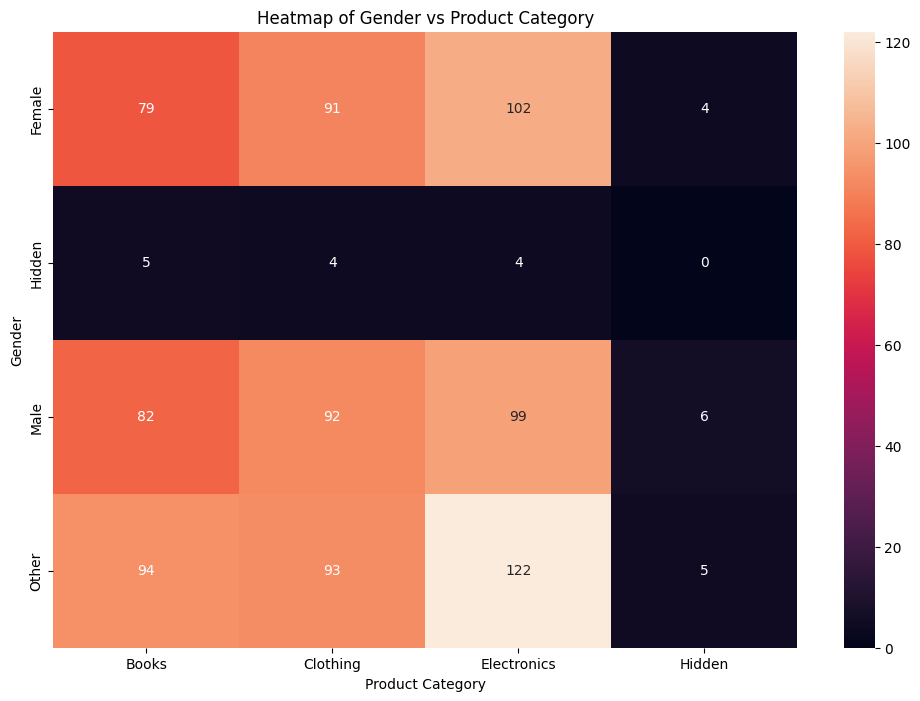

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(ct, annot=True, fmt='d')
plt.title("Heatmap of Gender vs Product Category")
plt.ylabel('Gender')
plt.xlabel('Product Category')
plt.show()

### Income Level vs Average Spending per purchase
This analysis will provide insights into how income level might influence spending habits. Upon analysing, we can see that High Income people have higher span of people who tends to spend above average (Bigger upper whisker) and Hidden group have the highest Median of Average Spending.

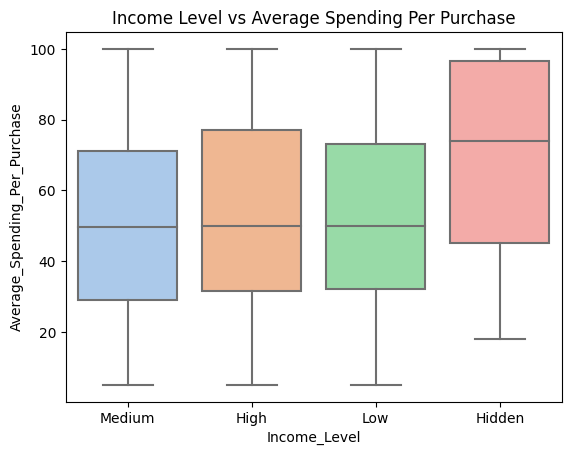

In [ ]:
sns.boxplot(data=data, x='Income_Level', y='Average_Spending_Per_Purchase')
plt.title('Income Level vs Average Spending Per Purchase')
plt.show()

### Brand Affinity Score vs Brand
The bar chart below depicts the average Brand Affinity Score for each Brand. This analysis is useful for understanding if certain brands are favored more.

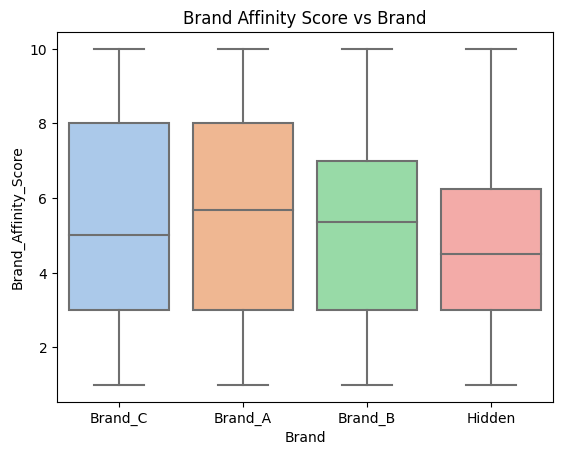

In [ ]:
sns.boxplot(data=data, x='Brand', y='Brand_Affinity_Score')
plt.title('Brand Affinity Score vs Brand')
plt.show()

### Purchase Frequency Per Month vs Season
below illustrations illustrates the average Sales frequency per month for each season. This visualization helps in identifying seasonal trends in sales frequency, revealing whether certain seasons experience more frequent sales than others. Upon analyzing, We can see that **Fall** have maximum Sales Average with **Winter** and **Hidden** having some skewed distributions (greater upper whisker)

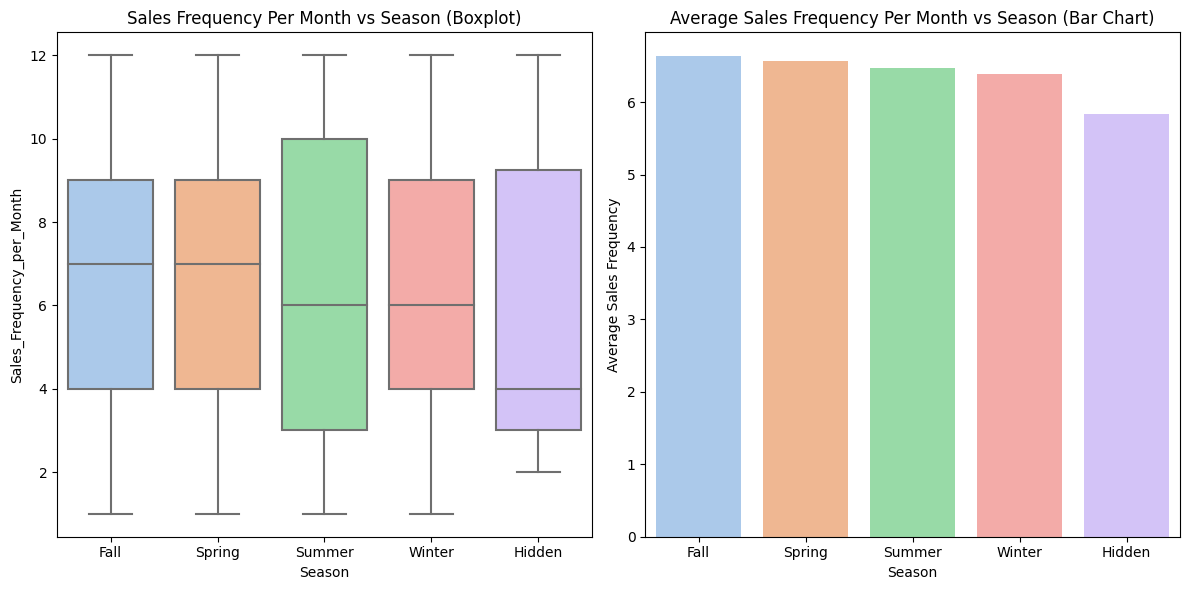

In [ ]:
season_average = data.groupby('Season')['Sales_Frequency_per_Month'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Season', y='Sales_Frequency_per_Month', order=season_average.index)
plt.title('Sales Frequency Per Month vs Season (Boxplot)')

plt.subplot(1, 2, 2)
sns.barplot(x=season_average.index, y=season_average.values)
plt.title('Average Sales Frequency Per Month vs Season (Bar Chart)')
plt.ylabel('Average Sales Frequency')

plt.tight_layout()
plt.show()

Month/Year of Purchase and Product Category: To analyze trends over time in different product categories.

### Age Group and Product Category
This analysis is important to see if certain age groups prefer specific products and we can see:
- Young Adult prefferes clothing over everything
- Adults enjoy buying books and electronics
- Senior preffer Electronics items

In [ ]:
ct = pd.crosstab(data['Age Group'], data['Product_Category'])
ct

Product_Category,Books,Clothing,Electronics,Hidden
Age Group,,,,
Teenager,5,3,4,0
Young Adult,56,79,78,2
Adult,119,113,136,2
Senior,91,96,117,11


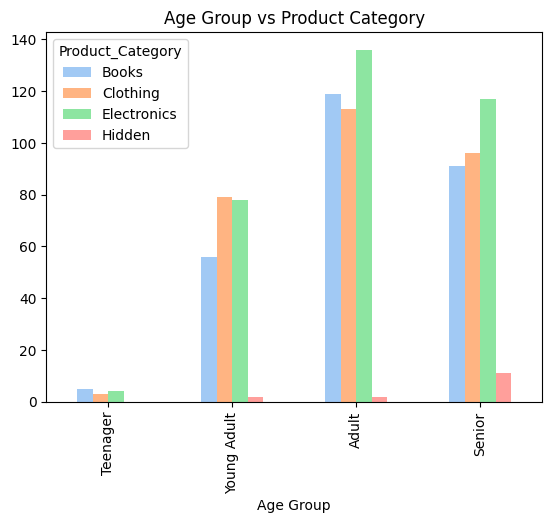

In [ ]:
ct.plot(kind='bar')
plt.title('Age Group vs Product Category')
plt.show()

Let's explore a different visualization for better descriptive stats of the same relation:

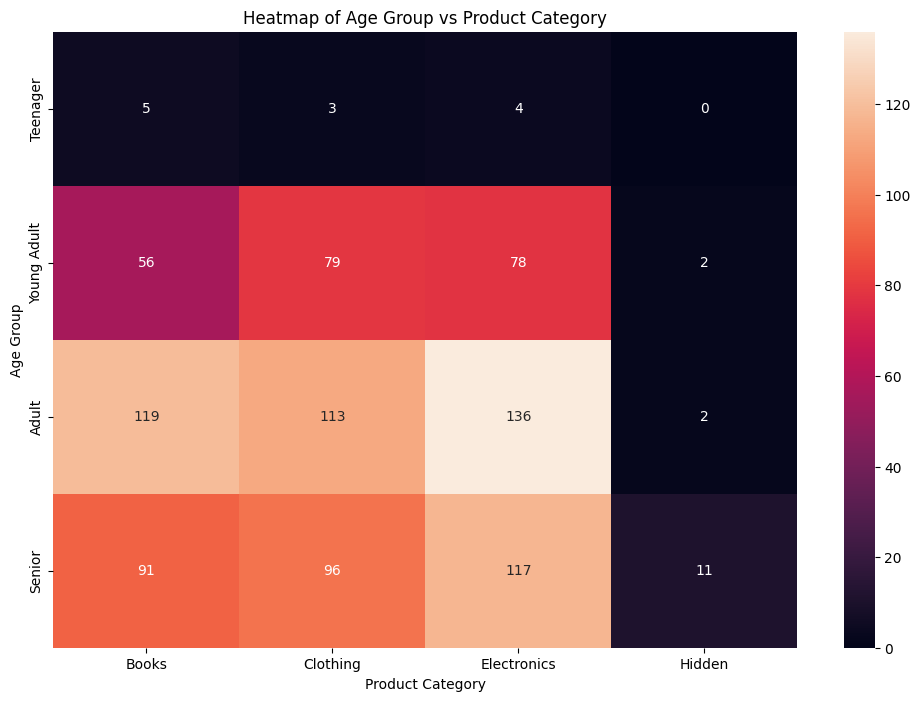

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(ct, annot=True, fmt='d')
plt.title("Heatmap of Age Group vs Product Category")
plt.ylabel('Age Group')
plt.xlabel('Product Category')
plt.show()

### Product Category and Product Range
This analysis is important to understand the price range of every product category.

In [ ]:
product_category_product_range = data.groupby(['Product_Category', 'Product Range']).size().unstack()
product_category_product_range

Product Range,Cheap,Average,Expensive
Product_Category,,,
Books,53,112,106
Clothing,46,134,111
Electronics,68,149,118
Hidden,3,9,3


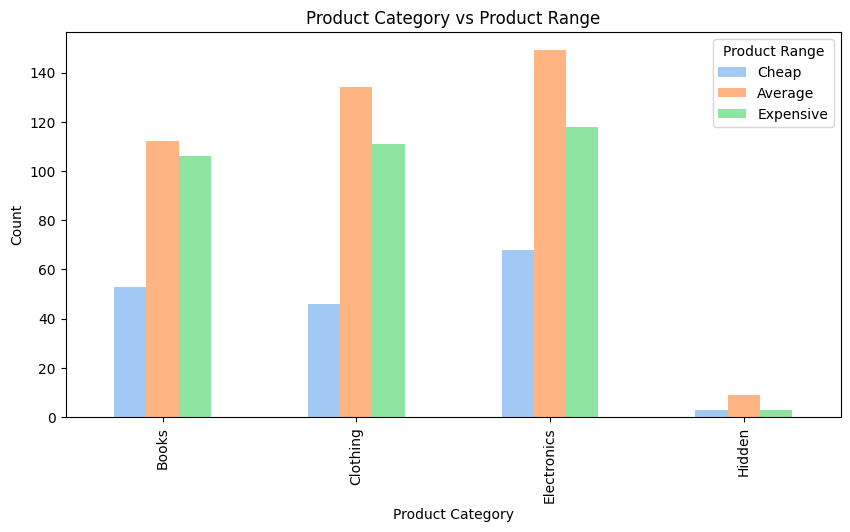

In [ ]:
product_category_product_range.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category vs Product Range')
plt.show()

Let's explore a different visualization for better descriptive stats of the same relation:

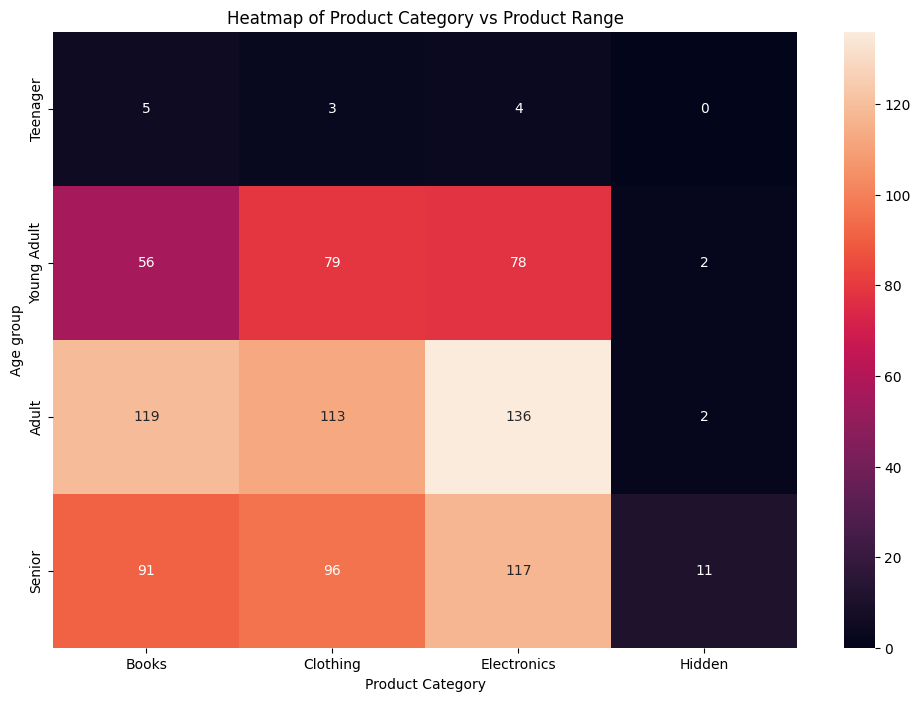

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(ct, annot=True, fmt='d')
plt.title("Heatmap of Product Category vs Product Range")
plt.ylabel('Age group')
plt.xlabel('Product Category')
plt.show()

## Temporal Analysis
It is important to understand the trends with respect to time based on different variables.

### Sales trends with respect to Age Group
On exploring the trends based on Age group we can have following conclusions:
- Teens have very low and rare occurances of sales.
- Young Adult don't have any specific trends, although it have a few Spikes in 2022.
- Adults have on average 5-10 sales.
- Senior shows a trend in 2020, with relatively lower sales in 2021 as compared to 2022 with a few spikes shown in 2022 as well.

In [ ]:
ct = pd.crosstab(data['Purchase_Date_Month_Year'], data['Age Group'])

Text(0.5, 1.0, 'Sales trends with respect to Age Group')

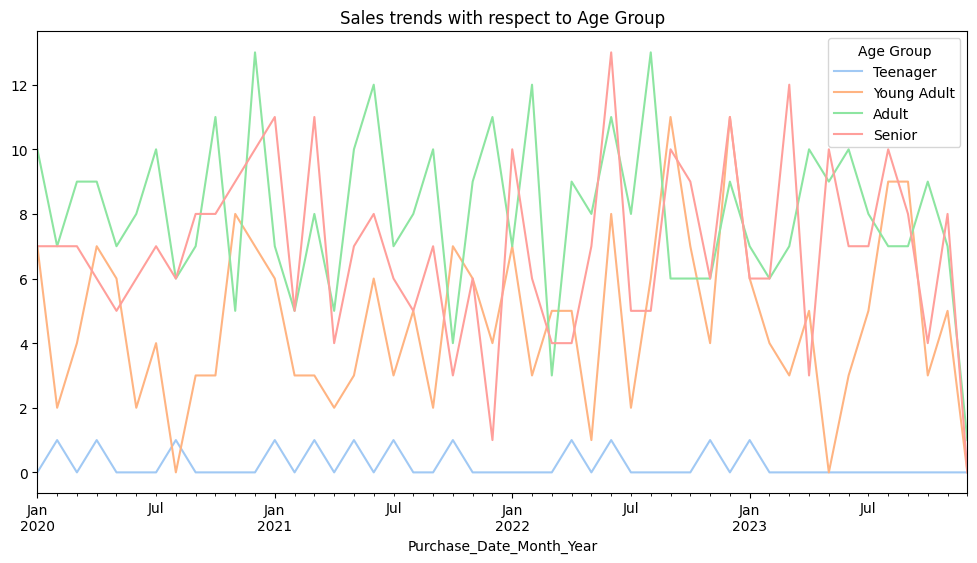

In [ ]:
ct.plot(kind='line', figsize=(12,6))
plt.title('Sales trends with respect to Age Group')

Let's make their multiple facets to get better visualization and understanding

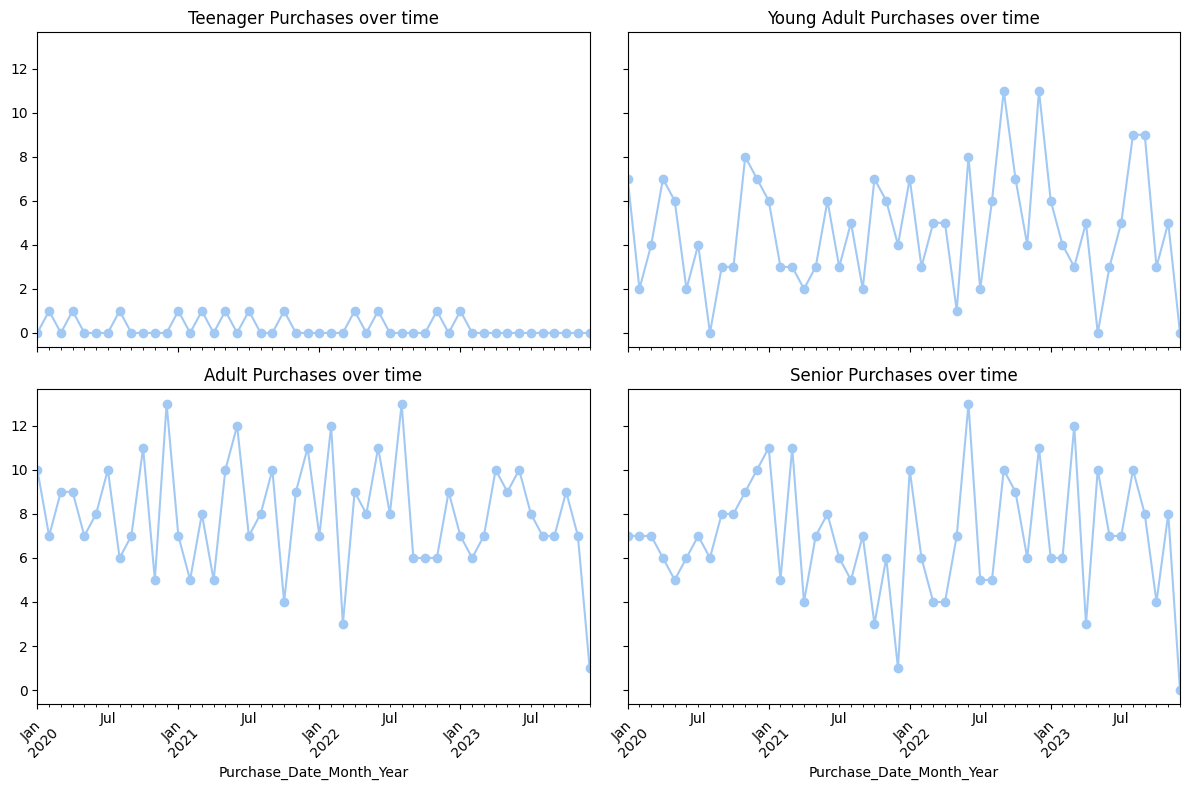

In [ ]:
# Get a list of unique product categories
age_groups = ct.columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plot each category on a separate subplot
ct['Teenager'].plot(kind='line', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Teenager Purchases over time')
axes[0, 0].tick_params(axis='x', rotation=45)

ct['Young Adult'].plot(kind='line', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Young Adult Purchases over time')
axes[0, 1].tick_params(axis='x', rotation=45)

ct['Adult'].plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Adult Purchases over time')
axes[1, 0].tick_params(axis='x', rotation=45)

ct['Senior'].plot(kind='line', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Senior Purchases over time')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

### Sales trends with respect to Brands
On exploring the Product Category trends, we can have see that relatively Brand_C show dominance in sales, however there are spikes in sales in all brands from time to time.

In [ ]:
ct = pd.crosstab(data['Purchase_Date_Month_Year'], data['Brand'])

Text(0.5, 1.0, 'Sales trends with respect to Product Category')

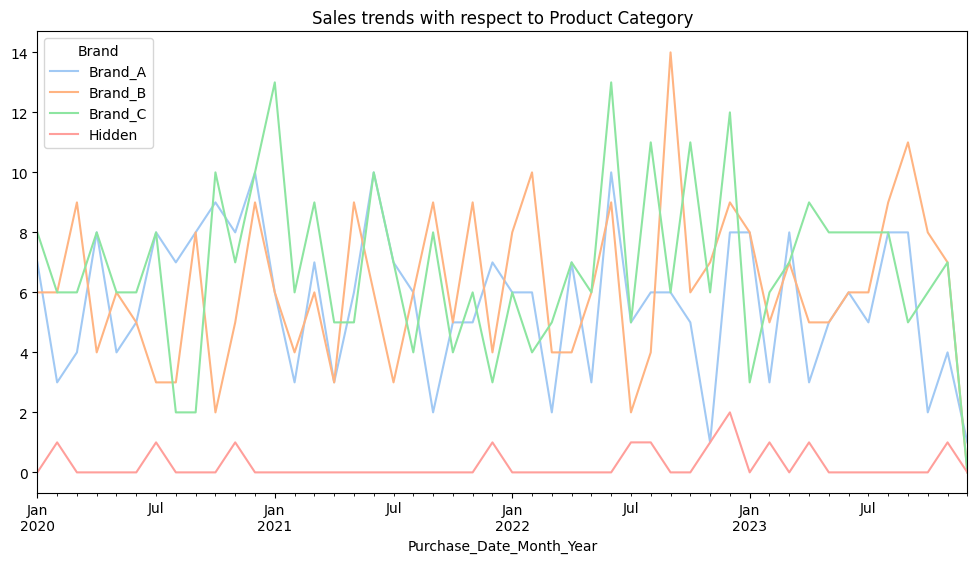

In [ ]:
ct.plot(kind='line', figsize=(12,6))
plt.title('Sales trends with respect to Product Category')

Let's make their multiple facets to get better visualization and understanding

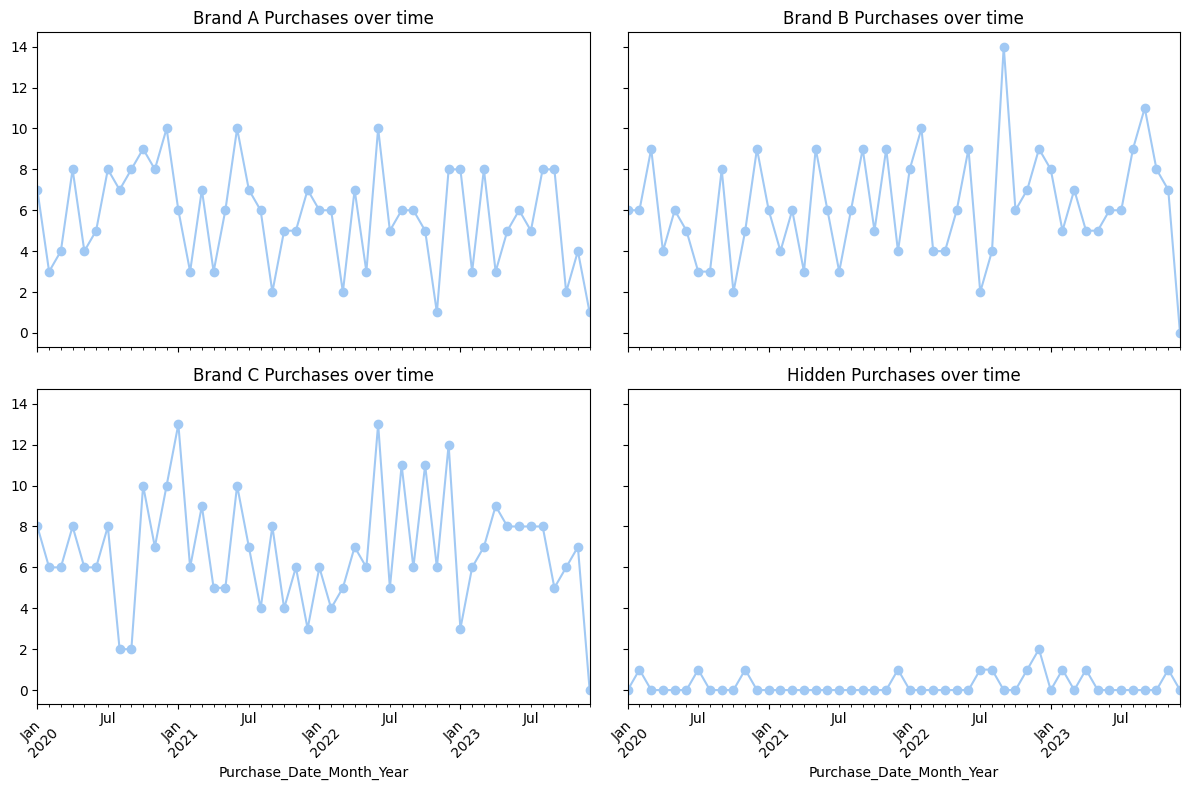

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plot each category on a separate subplot
ct['Brand_A'].plot(kind='line', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Brand A Purchases over time')
axes[0, 0].tick_params(axis='x', rotation=45)

ct['Brand_B'].plot(kind='line', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Brand B Purchases over time')
axes[0, 1].tick_params(axis='x', rotation=45)

ct['Brand_C'].plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Brand C Purchases over time')
axes[1, 0].tick_params(axis='x', rotation=45)

ct['Hidden'].plot(kind='line', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Hidden Purchases over time')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

### Sales trends with respect to Product Category
On exploring the Product Category trends, we can have see that None of the category show any specific trends, however there are spikes in sales in all categories time to time.

In [ ]:
ct = pd.crosstab(data['Purchase_Date_Month_Year'], data['Product_Category'])

Text(0.5, 1.0, 'Sales trends with respect to Age Group')

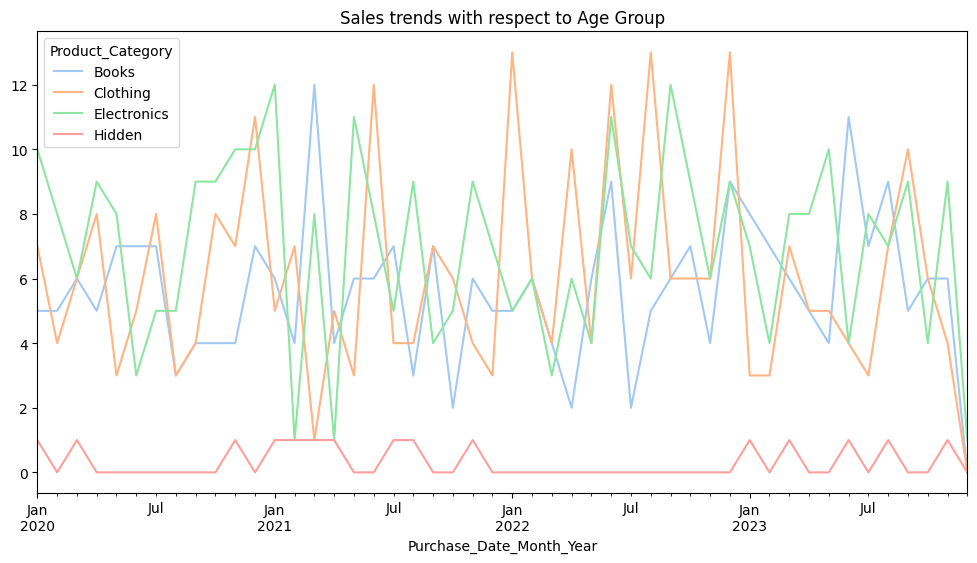

In [ ]:
ct.plot(kind='line', figsize=(12,6))
plt.title('Sales trends with respect to Age Group')

Let's make their multiple facets to get better visualization and understanding

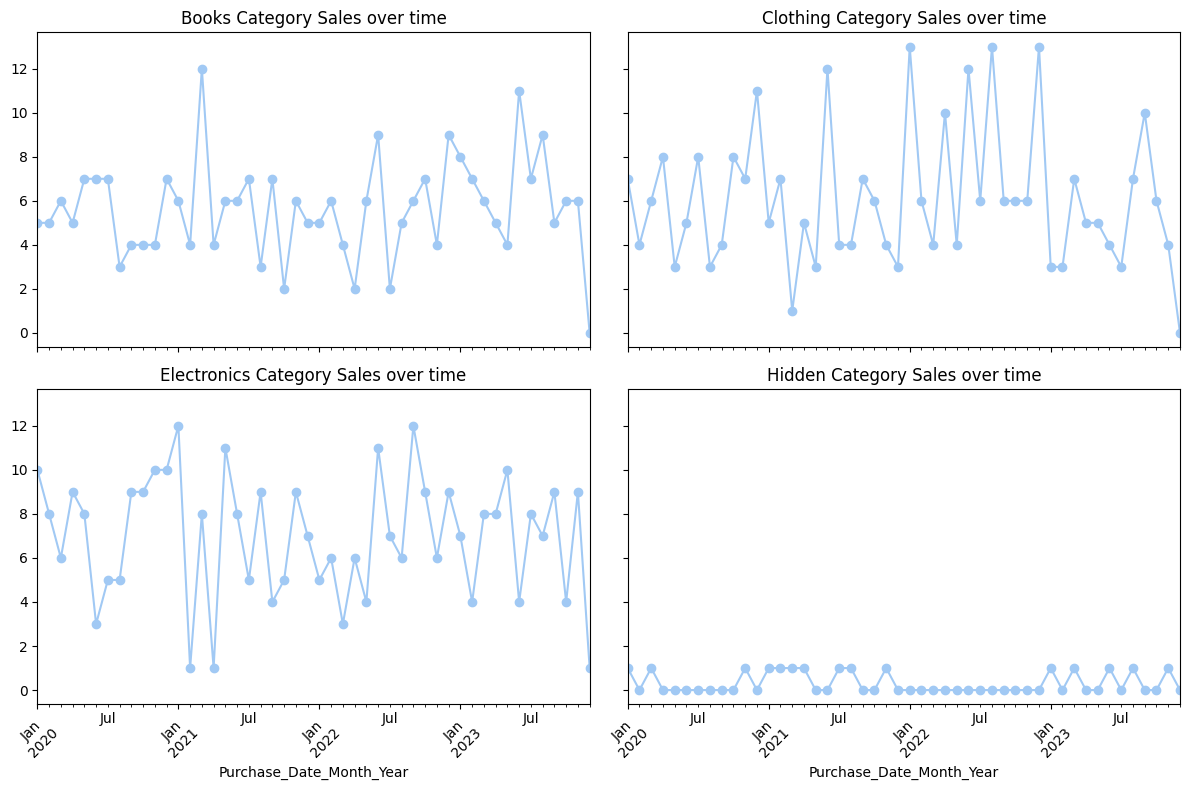

In [ ]:
# Get a list of unique product categories
categories = ct.columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plot each category on a separate subplot
ct['Books'].plot(kind='line', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Books Category Sales over time')
axes[0, 0].tick_params(axis='x', rotation=45)

ct['Clothing'].plot(kind='line', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Clothing Category Sales over time')
axes[0, 1].tick_params(axis='x', rotation=45)

ct['Electronics'].plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Electronics Category Sales over time')
axes[1, 0].tick_params(axis='x', rotation=45)

ct['Hidden'].plot(kind='line', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Hidden Category Sales over time')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

### Sales trends with respect to Gender
On exploring the Gender trends, we can have see that None of the gender show any specific trends, however there are spikes in sales in all gender categories time to time.

In [ ]:
ct = pd.crosstab(data['Purchase_Date_Month_Year'], data['Gender'])

Text(0.5, 1.0, 'Sales trends with respect to Gender')

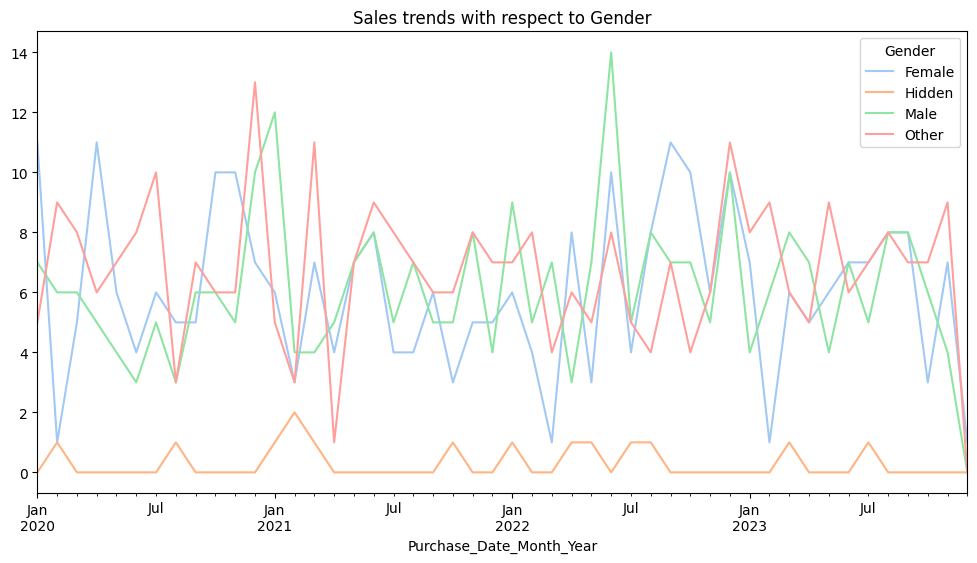

In [ ]:
ct.plot(kind='line', figsize=(12,6))
plt.title('Sales trends with respect to Gender')

Let's make their multiple facets to get better visualization and understanding

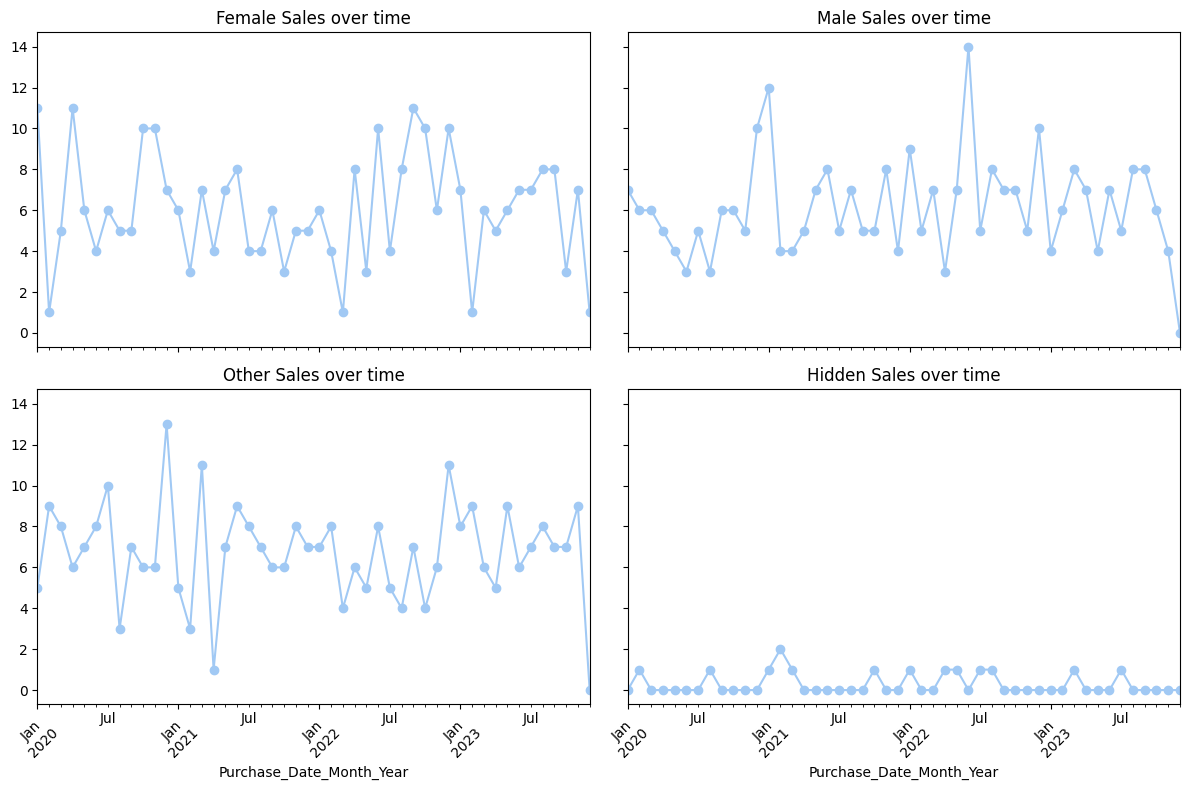

In [ ]:
# Get a list of unique product categories
categories = ct.columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plot each category on a separate subplot
ct['Female'].plot(kind='line', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Female Sales over time')
axes[0, 0].tick_params(axis='x', rotation=45)

ct['Male'].plot(kind='line', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Male Sales over time')
axes[0, 1].tick_params(axis='x', rotation=45)

ct['Other'].plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Other Sales over time')
axes[1, 0].tick_params(axis='x', rotation=45)

ct['Hidden'].plot(kind='line', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Hidden Sales over time')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

### Sales trends with respect to Income Level
On exploring the Income Level trends, we can have see that Medium Level of the Income dominates the sales majorly, however there are spikes in sales in all income level categories from time to time.

In [ ]:
ct = pd.crosstab(data['Purchase_Date_Month_Year'], data['Income_Level'])

Text(0.5, 1.0, 'Sales trends with respect to Income Level')

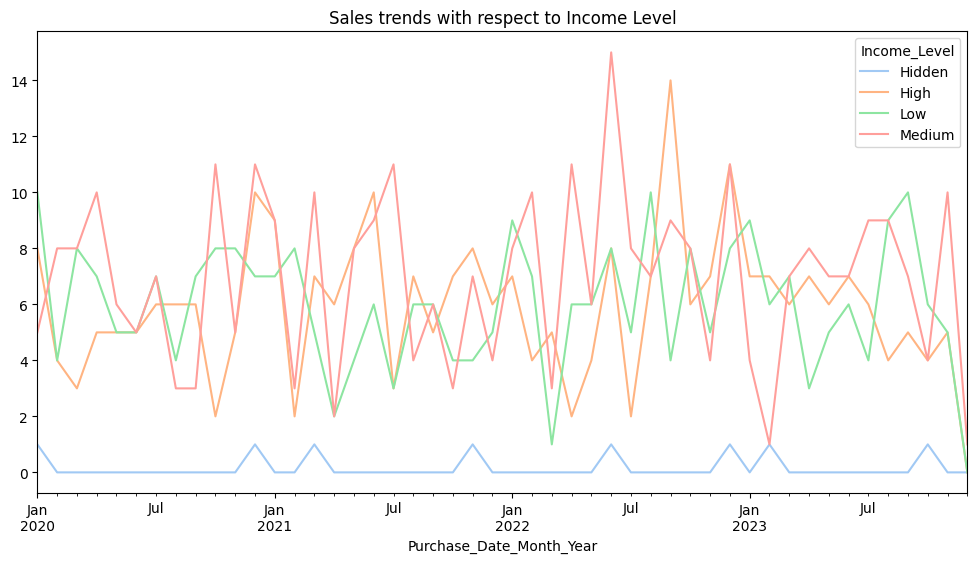

In [ ]:
ct.plot(kind='line', figsize=(12,6))
plt.title('Sales trends with respect to Income Level')

Let's create the facets for better visualizations

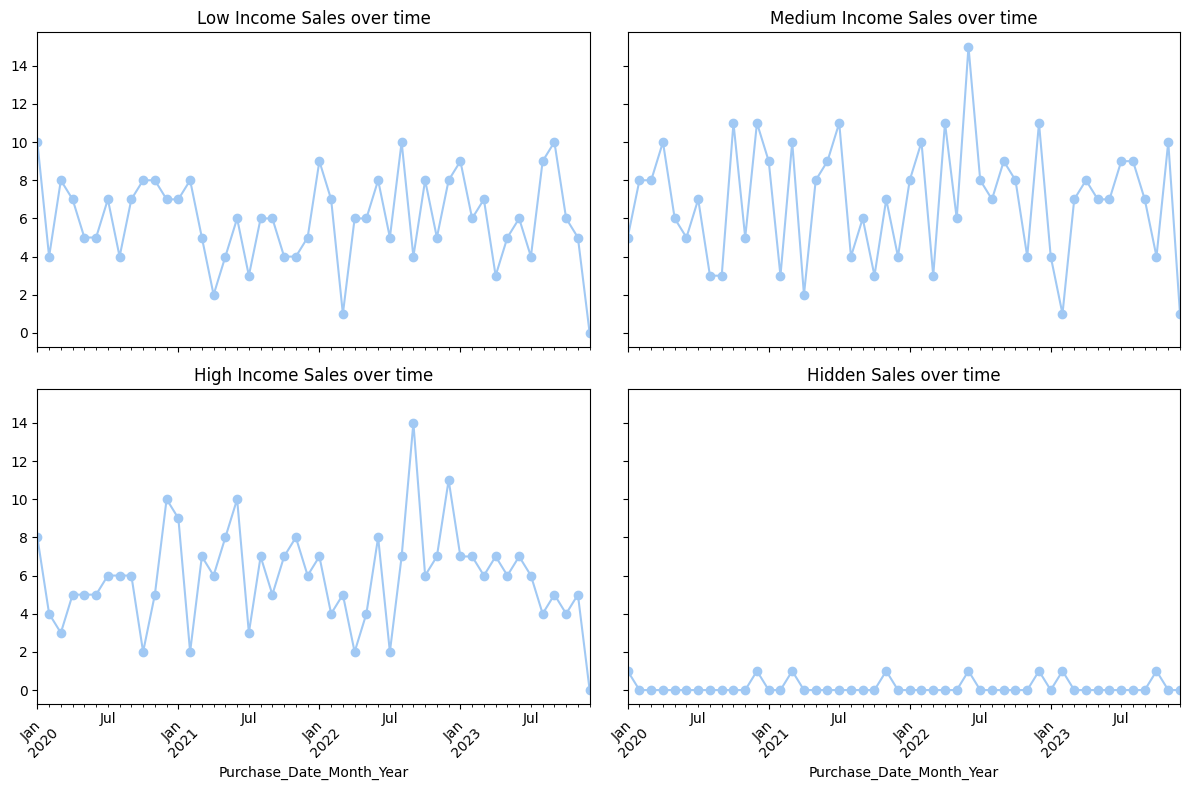

In [ ]:
# Get a list of unique product categories
level = ct.columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

# Plot each category on a separate subplot
ct['Low'].plot(kind='line', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Low Income Sales over time')
axes[0, 0].tick_params(axis='x', rotation=45)

ct['Medium'].plot(kind='line', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Medium Income Sales over time')
axes[0, 1].tick_params(axis='x', rotation=45)

ct['High'].plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('High Income Sales over time')
axes[1, 0].tick_params(axis='x', rotation=45)

ct['Hidden'].plot(kind='line', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Hidden Sales over time')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()